In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("winequality-red.csv")

In [3]:
df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


#### Data Preprocessing

In [4]:
df.isnull().sum().sum()
#No missing values in data

0

In [5]:
print(df.shape)
cols_name= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for var in cols_name:
    df=df[df[var]<160]
print(df.shape)

(1599, 12)
(1595, 12)


In [6]:
print("before cleaning "+str(df.duplicated().sum()))
df = df.drop_duplicates()
print("after cleaning "+ str(df.duplicated().sum()))

before cleaning 240
after cleaning 0


In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size = 0.25,random_state=1)
print(df_train)
print(df_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
260             7.9             0.330         0.23             1.7      0.077   
421             6.6             0.840         0.03             2.3      0.059   
1469            7.3             0.980         0.05             2.1      0.061   
1105            6.3             0.570         0.28             2.1      0.048   
849             6.4             0.630         0.21             1.6      0.080   
...             ...               ...          ...             ...        ...   
829             5.9             0.610         0.08             2.1      0.071   
1064            8.2             0.740         0.09             2.0      0.067   
1291            8.2             0.635         0.10             2.1      0.073   
267             7.9             0.350         0.46             3.6      0.078   
1251            7.5             0.580         0.14             2.2      0.077   

      free sulfur dioxide  

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x =df_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
y = df_test [['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

df_train = scaler.fit_transform(x)
df_test= scaler.transform(y)

print(df_train)
print(df_test)

[[-0.23298206 -1.11786435 -0.19709661 ... -0.03705712 -1.0460964
  -0.75787066]
 [-0.97753254  1.67624381 -1.22719001 ... -0.58893058  1.73554413
   1.69434778]
 [-0.57662074  2.4432539  -1.12418067 ... -0.65024985 -0.67521099
  -3.2100891 ]
 ...
 [-0.06116272  0.5531219  -0.86665732 ...  0.57613561  0.43744522
   0.46823856]
 [-0.23298206 -1.00829148  0.9875108  ...  1.25064761  2.19915089
   2.920457  ]
 [-0.46207452  0.25179651 -0.66063864 ... -0.40497276 -0.58248964
  -0.75787066]]
[[-0.11843584  0.06004399 -0.45461996 ... -0.40497276 -1.32426045
   0.46823856]
 [-0.86298631  1.62145738 -0.91816199 ... -1.26344258 -0.76793234
  -0.75787066]
 [ 0.56884152 -0.84393218  1.09052014 ... -0.5276113   2.57003629
   0.46823856]
 ...
 [-0.63389386 -1.11786435  0.31795009 ...  2.72231016 -0.39704694
   2.920457  ]
 [ 0.22520284 -0.0769221  -0.91816199 ...  1.25064761  0.15928117
   1.69434778]
 [-0.51934763 -0.18649496  1.03901547 ... -0.5276113  -1.2315391
  -0.75787066]]


#### Data Visualisation

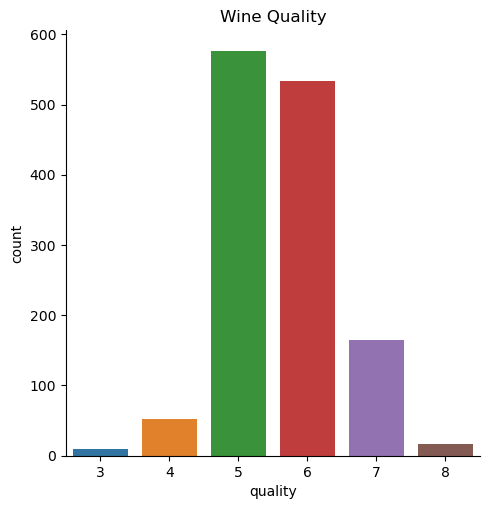

In [14]:
sns.catplot(x='quality',kind='count',data=df)
plt.title("Wine Quality")
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

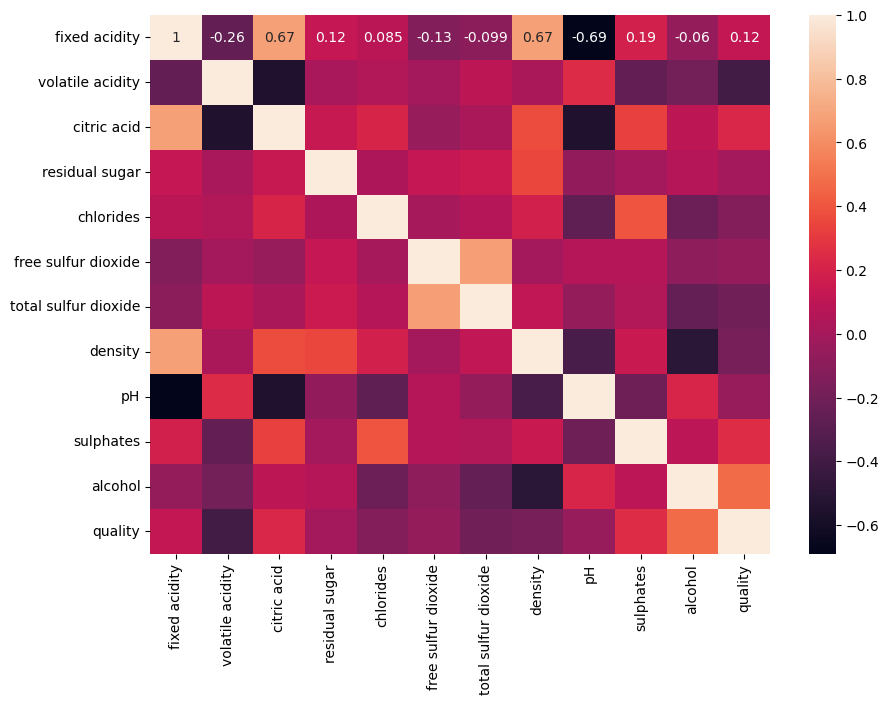

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

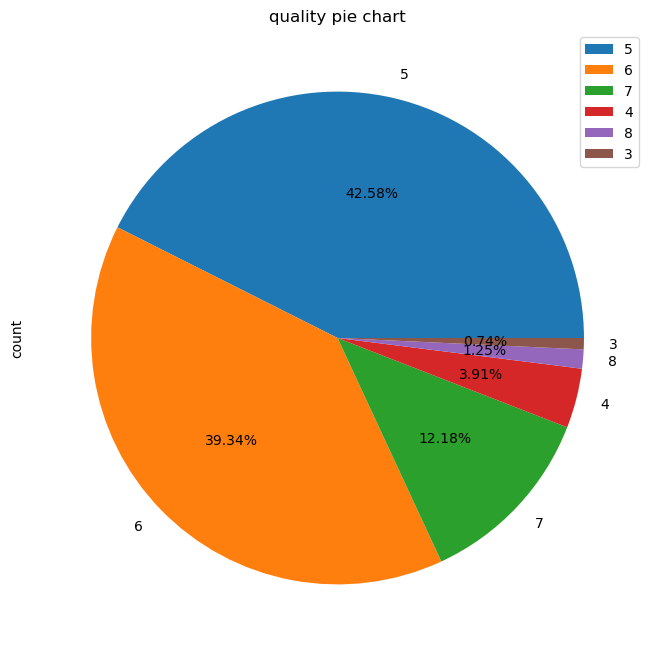

In [25]:
df.quality.value_counts().plot.pie(autopct='%.2f%%',figsize=(8,8))
plt.title("quality pie chart")
plt.legend()
plt.show()